---
## EJERCICIO 1 – Torres de Hanoi

Las Torres de Hanói es un rompecabezas o juego matemático inventado en 1883 por el matemático francés Édouard Lucas.
Este juego de mesa individual consiste en un número de discos perforados de radio creciente que se apilan insertándose
en uno de los tres postes fijados a un tablero. El objetivo del juego es trasladar la pila a otro de los postes siguiendo 
ciertas reglas, como que no se puede colocar un disco más grande encima de un disco más pequeño. 

El problema es muy conocido en la ciencia de la computación y aparece en muchos libros de texto como introducción a la teoría d
e algoritmos. https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i

Se pide al alumno programar un algoritmo que resuelva el problema de las Torres de Hanoi de manera recursiva, 
y medir el tiempo que tarda con 7 discos.


### Esquema solución recursiva
the solution to the N problem, defined as moving a stack of n elemenst form source to target using Aux rod is, names as Hanoi(N,Source,Target,Aux)  
If you could solve the N-1 problem then the N problem can be solved as follows:

<ol>
<li>take the n-1 top from source rod into the Aux rod y using Target as auxiliary Rod.</li>
<li>Mov the n-th disk, now on top, to the target</li>
<li>take the n-1 disks from the auxiliary in to the target, using Aux as auxiliary rod</li>
</ol>
Now, the first, and third moves, can be defined as: Hanoi(N-1,Source, Aux, Target) and Hanoi (N-1, Aux, Target, Source)  
which, in the end, decomposes into moves of size N-2, and so on....

When N = 0, just return...



In [17]:
import time
count =  0
def hanoi_solve(n, source, target, auxiliary,display_progres):
    global count
    global A,B,C
    
    if n > 0:
        # Move n - 1 disks from source to auxiliary, so they are out of the way
        hanoi_solve(n - 1, source, auxiliary, target,display_progres)

        # Move the last disk from source to target
        target.append(source.pop())

        # Count our iterations
        count += 1
        # Display our progress
        if display_progres:
            print ("%d ############" % count)
            print ("A", A)
            print ("B", B)
            print ("C", C)
        
        # Move the n - 1 disks that we left on auxiliary onto target, using source as auxiliary
        hanoi_solve(n - 1, auxiliary, target, source,display_progres)
        
    return count

print ("hanoi_solve Defined")

hanoi_solve Defined


In [ ]:
count = 0
size = 3
A = list(range(size,0,-1))
B = []
C = []
print (f"Hanoi Problems solved in {hanoi_solve(size, A, C, B,True)} steps")

In [32]:
# Initiate call from source A to target C with auxiliary B

hanoi_t = []
hanoi_s = []

for size in range(2,25):
    count = 0     
    A = list(range(size,0,-1))
    B = []
    C = []
    t0 = time.time()
    count = hanoi_solve(size, A, C, B,False)
    e_t = time.time() - t0
    hanoi_t.append(count)
    hanoi_s.append(size)

    print ("Solving Hanoi of size %d takes %d iterations and %.4f secs" % ( size,count, e_t))
    

Solving Hanoi of size 2 takes 3 iterations and 0.0000 secs
Solving Hanoi of size 3 takes 7 iterations and 0.0000 secs
Solving Hanoi of size 4 takes 15 iterations and 0.0000 secs
Solving Hanoi of size 5 takes 31 iterations and 0.0000 secs
Solving Hanoi of size 6 takes 63 iterations and 0.0000 secs
Solving Hanoi of size 7 takes 127 iterations and 0.0001 secs
Solving Hanoi of size 8 takes 255 iterations and 0.0001 secs
Solving Hanoi of size 9 takes 511 iterations and 0.0003 secs
Solving Hanoi of size 10 takes 1023 iterations and 0.0005 secs
Solving Hanoi of size 11 takes 2047 iterations and 0.0011 secs
Solving Hanoi of size 12 takes 4095 iterations and 0.0036 secs
Solving Hanoi of size 13 takes 8191 iterations and 0.0106 secs
Solving Hanoi of size 14 takes 16383 iterations and 0.0165 secs
Solving Hanoi of size 15 takes 32767 iterations and 0.0310 secs
Solving Hanoi of size 16 takes 65535 iterations and 0.0383 secs
Solving Hanoi of size 17 takes 131071 iterations and 0.0894 secs
Solving Ha

### Lets plot it...

[ 0.69860494 -0.09481669]


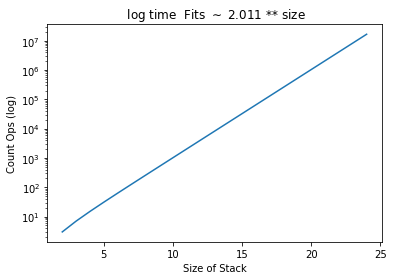

In [47]:
import matplotlib.pyplot as plt
import numpy as nd
import math

lhanoi_t = [ math.log(t) for t in hanoi_t]
fit  = nd.polyfit(hanoi_s,lhanoi_t,1)
print (fit)
fig,ax = plt.subplots()
ax.plot(hanoi_s,hanoi_t)
ax.set_yscale('log')
ax.set_xlabel('Size of Stack')
ax.set_ylabel('Count Ops (log)')
ax.set_title(f" log time  Fits $\sim$ {math.exp(fit[0]):.3f} ** size")
plt.show()

### Analicemos la complejidad:
En cada iteración,  sobre un stack de tamaño $n$ se producen:
* Dos llamadas al mismo algoritmo con tamaño  n-1
* Un movimiento de pieza simple. Cuyo coste es $\cal{O}(1)$

La expresión de recurrencia es :
$$ T(N) = 2\times T(N-1) + \cal{O}(1)$$

En arbol de recursión: 
* el factor de expansión, branching factor, es 2.
* la profundidad del árbol es n

En el último de los niveles, hay $2^n$ nodos, y en los niveles anteriores el coste es de $ 2^{i}$ siendo $ i=0$ el nodo raíz, e $i$  el nivel. 

En consecuencia podemos estimar:

\begin{align} 
\cal{O}(T(N)) &= 2^n + 2^{n-1} + 2^{n-2} + ... + 2 + 1 \\
              &= \sum_{i=0}^n 2^i = 2^{n+1} - 1 \\
              & = \cal{O}(2^n)
\end{align} 

Lo que está en línea con la pendiente de la reprentanción logarítmica de los tiempos de ejecución experimentalmente determinada

_____
## EJERCICIO 2 MCD

El máximo común divisor (MCD) de dos o más números enteros se se define como el mayor número entero que los divide sin dejar residuo alguno. Por ejemplo, el M.C.D. de 36 y 60 es 12. Existen tres métodos para calcularlo:

1. Por descomposición en factores primos (normalmente el que se enseña en la enseñanzas primaria y secundaria).
2. Usando el mínimo común múltiplo.

3. El Algoritmo de Euclides.- Este método se puede programar de forma recursiva. SSea a y b dos números enteros, el M.C.D. es:

1. Si b!=0 mcd(b, a mod b)

2. Si b=0 mcd (a,0) = 1

Se pide al alumno programar el algoritmo recursivo y mostrar unos ejemplos de prueba.



In [48]:
def maxCommonDiv(a,b):
    aMax = max(a,b)
    aMin = min(a,b)
    rem = aMax % aMin
    if rem  == 0:
        return aMin
    else:
        return maxCommonDiv(aMin, rem)

In [49]:
maxCommonDiv(23*345,23*456)

69

## BONUS: Euclides proof
Given $A$ and $B$ such that both are integers and $ A \ge B$. We  can say that $ A = n_0\times B + R_0$; where $n_0 = int(A/b) $ and $ R_0 = mod(A,B)$  
If $ R_0 = 0 $ we are done...  
if not, as $R_0 \lt B$, we apply the same algorithm to the couple $ (B, R_0)$. that is: $ B = n_1 \times R_0 + R_1$  
Lets suppose $ R_1 \ne 0$. Then  we apply the same algorithm to $(R_0, R_1)$  as $ R_0 = n_2 \times R_1 + R_2$  
Lets proceed recursively until one of the divisions produce no remainder. That is,  till we find $R_{k+1} =  0 $  

Then, it can be proved that $\hspace{20pt} mcd(A,B) = R_k $

Why?  
Since $ R_k = 0 $ we can write that the end of the above sequence is:  
$\hspace{20pt} R_{k-1} = n_{k+1} R_k$  
and working backwards...  
$\hspace{20pt} R_{k-2} = n_{k} R_{k-1} +R_k = (n_k n_{k+1})R_k $  
$\hspace{20pt} R_{k-3} = n_{k-1} R_{k-2} +R_k-1 = (n_{k-1}n_k n_{k+1}+n_{k+1}+1)R_k $  
$\hspace{20pt} ...$  
Without entering much detail, as all $n_i$ are integers, this proves that $R_1$ and $R_0$ are multiples of $R_k$  
and since  
$\hspace{20pt}  B = n_1 \times R_0 + R_1$  
We can conclude that $B$ is multiple of $R_k$. Since $ A = n_0\times B + R_0$ then $R_k$ also divides $A$

HOw can we prove is the max common divisor, and just not any divisor ?

---
---

## EJERCICIO 3 Multiplicación

Se pide al alumno que programe una función recursiva que recibiendo dos números devuelva la multiplicación de los mismos. Usando el siguiente prototipo.

def multiplicación (m1, m2)

### solution

See that  

$\hspace{20pt} {\tt mult}(m1,m2) = m2 + {\tt mult}(m1, m2-1)$

And, as closure: 

$\hspace{20pt} {\tt mult}(m1,1) = m1 $

Implementation has to acount for sign, as the decrement of $m2$  must be  towards 0,  and this will not work for non-integer $m2$

In [ ]:
def mult(a,b):
    # just for b integers 
    if not isinstance(b,int):
        raise Exception("Mal argumento B debe ser entero")
    # bounds
    if    a == 0 or b == 0 :
        return 0
    if a == 1 : return b
    
    # end condition
    if b ==  1 : return  a
    if b == -1 : return -a
    
    # recursive call
    if b > 0:   return a + mult(a, b-1)
    else:  return -a + mult(a, b+1)

a = 1.9
b = -10
print(mult(a,b),a*b)

In [ ]:
def sign(x): 
  return (1-2*(x<0))*(x!=0)
def mult2(a,b):
 
    # just for b integers 
    if not isinstance(b,int):
        raise Exception("Mal argumento B debe ser entero")
    # bounds
    if    a == 0 or b == 0 :
        return 0
    if a == 1 : return b
    
    # end condition
    if b ==  1 : return  a
    if b == -1 : return -a
    
    # recursive call
    return a*sign(b) + mult2(a, b-1*sign(b))
    
a = -1.9
b = -10
print(mult2(a,b),a*b)


---
## Iterative Hanoi solution

A simple solution for the toy puzzle is to alternate moves between the smallest piece and a non-smallest piece.  
 When moving the smallest piece, always move it to the next position in the same direction (to the right if the starting number of pieces is even, to the left if the starting number of pieces is odd).   
 If there is no tower position in the chosen direction, move the piece to the opposite end, but then continue to move in the correct direction.  
 For example, if you started with three pieces, you would move the smallest piece to the opposite end, then continue in the left direction after that. When the turn is to move the non-smallest piece, there is only one legal move.   
 Doing this will complete the puzzle in the fewest moves.[8]

In [50]:
def done (A,B):
    return (len(A) == 0)  and  (len(B) == 0)
    
def top(aList):
    if len(aList)== 0: 
        return None
    else:
        return aList[-1]

def robustMin(aCol):
    filtered =[element for element in aCol if element is not None]
    return min(filtered) if len(filtered) != 0 else None

def whereIstheMin(listOfLists):
    # returns the index of the list where the min at top is
    tops = [top(list) for list in listOfLists ] 
    minVal = robustMin(tops) 
    return tops.index(minVal) if minVal is not None else None
    
def move(A,B,C,dir):
    count = 0 
    
    # assemble the stacks in convenient list
    listOfLists = [A,B,C]
    
    # which of the stacks have the minimum ?
    sourceListNum = whereIstheMin(listOfLists)
    
    # where to move it...
    if dir == 1:  # move right
        targetListNum = (sourceListNum + 1) % 3
    else:        # move left
        targetListNum = (sourceListNum + 2) % 3
    
    sourceList = listOfLists[sourceListNum]
    targetList = listOfLists[targetListNum]
    targetList.append(sourceList.pop())
    count += 1
    
    # now do the next min move    
    # remove the current Target list, because here is the minimum we just moved
    listOfLists.remove(targetList)
    # find where is the next min
    sourceListNum = whereIstheMin(listOfLists)
    # Got none if both were empty, else..
    if sourceListNum is not None:
        # pop out the list where the next min is 
        sourceList = listOfLists.pop(sourceListNum)
        targetList = listOfLists[0]
        
        # do the move
        targetList.append(sourceList.pop())
        count += 1
    return count
    
    
def iterative_hanoi(size,A,B,C,display):
    dir = 1 if size %2 == 0 else -1
    count = 0    
    while not done(A,B):
        count  += move(A,B,C,dir)
        if display:
            print ("%d ############" % count)
            print ("A", A)
            print ("B", B)
            print ("C", C)
    return count    

In [ ]:
# show it works
size = 5
A = list(range(size,0,-1))
B = []
C = []
iterative_hanoi(size,A,B,C,True)

In [52]:
# Now time it 
import time
size = 20
A = list(range(size,0,-1))
B = []
C = []
t0  = time.process_time_ns()
steps = iterative_hanoi(size,A,B,C,False)
t1 = (time.process_time_ns() - t0)*1E-9
print ( f"Solved Iteratively Hanoi of size {size} whith {steps} steps in {t1:.3E} secs")

Solved Iteratively Hanoi of size 20 whith 1048575 steps in 2.523E+00 secs



### Hanoi comparison
of steps is the same, however is a lot slower, in the non-recursive.. a lot more manipulation required...

# Anexo

## Factorization of a number

In [2]:
def factors(n):
    fList = []

    def firstFactor(n,p):
        while True:
            if n%p == 0:
                return p
            else:
                p = p + 1
        return n

    p = 2
    while True:
        factor = firstFactor(n,p)
        fList.append(factor)
        if factor == n:
            return fList
        else:
            n = n / factor
            p = factor

print ("Factors function defined")

Factors function defined


In [11]:
factors(2342342346573)

[3, 2371, 329304421]